# DDoS Cybersecurity Data

# Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('D:\\IIT Kharagpur Notes\\Semester IV\\Datasets\\MachineLearningCSV\\MachineLearningCVE\\Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')

In [3]:
df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,61374,61,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225741,61378,72,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225742,61375,75,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225743,61323,48,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [4]:
df['attack_label'] = 0

In [5]:
for i in range(len(df)):
    if df[' Label'][i] != 'BENIGN':
        df['attack_label'][i] = 1

In [6]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,attack_label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0


In [7]:
df.tail()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,attack_label
225740,61374,61,1,1,6,6,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
225741,61378,72,1,1,6,6,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
225742,61375,75,1,1,6,6,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
225743,61323,48,2,0,12,0,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
225744,61326,68,1,1,6,6,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0


In [8]:
df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,attack_label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,61374,61,1,1,6,6,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
225741,61378,72,1,1,6,6,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
225742,61375,75,1,1,6,6,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
225743,61323,48,2,0,12,0,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 80 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             225745 non-null  int64  
 1    Flow Duration                225745 non-null  int64  
 2    Total Fwd Packets            225745 non-null  int64  
 3    Total Backward Packets       225745 non-null  int64  
 4   Total Length of Fwd Packets   225745 non-null  int64  
 5    Total Length of Bwd Packets  225745 non-null  int64  
 6    Fwd Packet Length Max        225745 non-null  int64  
 7    Fwd Packet Length Min        225745 non-null  int64  
 8    Fwd Packet Length Mean       225745 non-null  float64
 9    Fwd Packet Length Std        225745 non-null  float64
 10  Bwd Packet Length Max         225745 non-null  int64  
 11   Bwd Packet Length Min        225745 non-null  int64  
 12   Bwd Packet Length Mean       225745 non-nul

In [10]:
df.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,attack_label
count,225745.00000,2.257450e+05,225745.000000,225745.000000,225745.000000,2.257450e+05,225745.000000,225745.000000,225745.000000,225745.000000,...,225745.000000,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,225745.000000
mean,8879.61946,1.624165e+07,4.874916,4.572775,939.463346,5.960477e+03,538.535693,27.882221,164.826715,214.907242,...,21.482753,1.848261e+05,1.293436e+04,2.080849e+05,1.776201e+05,1.032214e+07,3.611943e+06,1.287813e+07,7.755355e+06,0.567131
std,19754.64740,3.152437e+07,15.422874,21.755356,3249.403484,3.921834e+04,1864.128991,163.324159,504.892965,797.411073,...,4.166799,7.979250e+05,2.102737e+05,9.002350e+05,7.842602e+05,2.185303e+07,1.275689e+07,2.692126e+07,1.983109e+07,0.495474
min,0.00000,-1.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,80.00000,7.118000e+04,2.000000,1.000000,26.000000,0.000000e+00,6.000000,0.000000,6.000000,0.000000,...,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,80.00000,1.452333e+06,3.000000,4.000000,30.000000,1.640000e+02,20.000000,0.000000,8.666667,5.301991,...,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
75%,80.00000,8.805237e+06,5.000000,5.000000,63.000000,1.160100e+04,34.000000,6.000000,32.000000,10.263203,...,20.000000,1.878000e+03,0.000000e+00,1.878000e+03,1.862000e+03,8.239725e+06,0.000000e+00,8.253838e+06,7.422849e+06,1.000000
max,65532.00000,1.199999e+08,1932.000000,2942.000000,183012.000000,5.172346e+06,11680.000000,1472.000000,3867.000000,6692.644993,...,52.000000,1.000000e+08,3.950000e+07,1.000000e+08,1.000000e+08,1.200000e+08,6.530000e+07,1.200000e+08,1.200000e+08,1.000000


In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Destination Port,225745.0,8.879619e+03,1.975465e+04,0.0,80.0,80.0,80.0,65532.0
Flow Duration,225745.0,1.624165e+07,3.152437e+07,-1.0,71180.0,1452333.0,8805237.0,119999937.0
Total Fwd Packets,225745.0,4.874916e+00,1.542287e+01,1.0,2.0,3.0,5.0,1932.0
Total Backward Packets,225745.0,4.572775e+00,2.175536e+01,0.0,1.0,4.0,5.0,2942.0
Total Length of Fwd Packets,225745.0,9.394633e+02,3.249403e+03,0.0,26.0,30.0,63.0,183012.0
...,...,...,...,...,...,...,...,...
Idle Mean,225745.0,1.032214e+07,2.185303e+07,0.0,0.0,0.0,8239725.0,120000000.0
Idle Std,225745.0,3.611943e+06,1.275689e+07,0.0,0.0,0.0,0.0,65300000.0
Idle Max,225745.0,1.287813e+07,2.692126e+07,0.0,0.0,0.0,8253838.0,120000000.0
Idle Min,225745.0,7.755355e+06,1.983109e+07,0.0,0.0,0.0,7422849.0,120000000.0


In [12]:
df.corr()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,attack_label
Destination Port,1.000000,0.107038,-0.044270,0.008321,0.553843,-0.066648,0.604586,0.207158,0.658346,0.586255,...,-0.074278,0.061313,-0.026592,0.043156,0.066356,0.132272,0.110687,0.144428,0.095687,-0.509798
Flow Duration,0.107038,1.000000,0.207660,0.145272,0.297832,0.088751,0.280808,-0.055700,0.257098,0.273820,...,-0.112832,0.428397,0.148295,0.446759,0.413835,0.871855,0.630604,0.919199,0.672003,0.025923
Total Fwd Packets,-0.044270,0.207660,1.000000,0.956714,0.174396,0.938470,0.041866,-0.038103,0.017458,0.030054,...,-0.005388,0.135892,0.285131,0.223377,0.087692,0.110787,0.056807,0.109429,0.094747,-0.029870
Total Backward Packets,0.008321,0.145272,0.956714,1.000000,0.163495,0.970422,0.047501,-0.001468,0.032013,0.034200,...,0.009922,0.099090,0.228430,0.164830,0.063551,0.065554,0.028627,0.062932,0.058056,-0.069290
Total Length of Fwd Packets,0.553843,0.297832,0.174396,0.163495,1.000000,0.067425,0.852427,0.004453,0.858439,0.839139,...,-0.048262,0.185853,0.106051,0.203046,0.171280,0.261110,0.216771,0.284694,0.188569,-0.319693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Idle Mean,0.132272,0.871855,0.110787,0.065554,0.261110,0.042256,0.272060,-0.039715,0.262143,0.270210,...,-0.139772,0.595859,0.022025,0.531538,0.602021,1.000000,0.420170,0.952585,0.910822,0.087114
Idle Std,0.110687,0.630604,0.056807,0.028627,0.216771,0.020081,0.230387,-0.048230,0.223047,0.232630,...,-0.099363,-0.057820,-0.003866,-0.055222,-0.058847,0.420170,1.000000,0.676276,0.008218,0.078023
Idle Max,0.144428,0.919199,0.109429,0.062932,0.284694,0.041055,0.298035,-0.048410,0.287524,0.297282,...,-0.146873,0.464725,0.017842,0.413812,0.469089,0.952585,0.676276,1.000000,0.742109,0.096775
Idle Min,0.095687,0.672003,0.094747,0.058056,0.188569,0.036789,0.194918,-0.021718,0.187498,0.191951,...,-0.109090,0.682722,0.024496,0.609839,0.690201,0.910822,0.008218,0.742109,1.000000,0.061243


In [13]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
225740    False
225741    False
225742    False
225743    False
225744    False
Length: 225745, dtype: bool

In [14]:
df.drop_duplicates()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,attack_label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,61374,61,1,1,6,6,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
225741,61378,72,1,1,6,6,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
225742,61375,75,1,1,6,6,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
225743,61323,48,2,0,12,0,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 80 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             225745 non-null  int64  
 1    Flow Duration                225745 non-null  int64  
 2    Total Fwd Packets            225745 non-null  int64  
 3    Total Backward Packets       225745 non-null  int64  
 4   Total Length of Fwd Packets   225745 non-null  int64  
 5    Total Length of Bwd Packets  225745 non-null  int64  
 6    Fwd Packet Length Max        225745 non-null  int64  
 7    Fwd Packet Length Min        225745 non-null  int64  
 8    Fwd Packet Length Mean       225745 non-null  float64
 9    Fwd Packet Length Std        225745 non-null  float64
 10  Bwd Packet Length Max         225745 non-null  int64  
 11   Bwd Packet Length Min        225745 non-null  int64  
 12   Bwd Packet Length Mean       225745 non-nul

In [16]:
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [17]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Destination Port,225745.0,8.879619e+03,1.975465e+04,0.0,80.0,80.0,80.0,65532.0
Flow Duration,225745.0,1.624165e+07,3.152437e+07,-1.0,71180.0,1452333.0,8805237.0,119999937.0
Total Fwd Packets,225745.0,4.874916e+00,1.542287e+01,1.0,2.0,3.0,5.0,1932.0
Total Backward Packets,225745.0,4.572775e+00,2.175536e+01,0.0,1.0,4.0,5.0,2942.0
Total Length of Fwd Packets,225745.0,9.394633e+02,3.249403e+03,0.0,26.0,30.0,63.0,183012.0
...,...,...,...,...,...,...,...,...
Idle Mean,225745.0,1.032214e+07,2.185303e+07,0.0,0.0,0.0,8239725.0,120000000.0
Idle Std,225745.0,3.611943e+06,1.275689e+07,0.0,0.0,0.0,0.0,65300000.0
Idle Max,225745.0,1.287813e+07,2.692126e+07,0.0,0.0,0.0,8253838.0,120000000.0
Idle Min,225745.0,7.755355e+06,1.983109e+07,0.0,0.0,0.0,7422849.0,120000000.0


In [18]:
df.corr()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,attack_label
Destination Port,1.000000,0.107038,-0.044270,0.008321,0.553843,-0.066648,0.604586,0.207158,0.658346,0.586255,...,-0.074278,0.061313,-0.026592,0.043156,0.066356,0.132272,0.110687,0.144428,0.095687,-0.509798
Flow Duration,0.107038,1.000000,0.207660,0.145272,0.297832,0.088751,0.280808,-0.055700,0.257098,0.273820,...,-0.112832,0.428397,0.148295,0.446759,0.413835,0.871855,0.630604,0.919199,0.672003,0.025923
Total Fwd Packets,-0.044270,0.207660,1.000000,0.956714,0.174396,0.938470,0.041866,-0.038103,0.017458,0.030054,...,-0.005388,0.135892,0.285131,0.223377,0.087692,0.110787,0.056807,0.109429,0.094747,-0.029870
Total Backward Packets,0.008321,0.145272,0.956714,1.000000,0.163495,0.970422,0.047501,-0.001468,0.032013,0.034200,...,0.009922,0.099090,0.228430,0.164830,0.063551,0.065554,0.028627,0.062932,0.058056,-0.069290
Total Length of Fwd Packets,0.553843,0.297832,0.174396,0.163495,1.000000,0.067425,0.852427,0.004453,0.858439,0.839139,...,-0.048262,0.185853,0.106051,0.203046,0.171280,0.261110,0.216771,0.284694,0.188569,-0.319693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Idle Mean,0.132272,0.871855,0.110787,0.065554,0.261110,0.042256,0.272060,-0.039715,0.262143,0.270210,...,-0.139772,0.595859,0.022025,0.531538,0.602021,1.000000,0.420170,0.952585,0.910822,0.087114
Idle Std,0.110687,0.630604,0.056807,0.028627,0.216771,0.020081,0.230387,-0.048230,0.223047,0.232630,...,-0.099363,-0.057820,-0.003866,-0.055222,-0.058847,0.420170,1.000000,0.676276,0.008218,0.078023
Idle Max,0.144428,0.919199,0.109429,0.062932,0.284694,0.041055,0.298035,-0.048410,0.287524,0.297282,...,-0.146873,0.464725,0.017842,0.413812,0.469089,0.952585,0.676276,1.000000,0.742109,0.096775
Idle Min,0.095687,0.672003,0.094747,0.058056,0.188569,0.036789,0.194918,-0.021718,0.187498,0.191951,...,-0.109090,0.682722,0.024496,0.609839,0.690201,0.910822,0.008218,0.742109,1.000000,0.061243


In [19]:
df.corr().transpose()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,attack_label
Destination Port,1.000000,0.107038,-0.044270,0.008321,0.553843,-0.066648,0.604586,0.207158,0.658346,0.586255,...,-0.074278,0.061313,-0.026592,0.043156,0.066356,0.132272,0.110687,0.144428,0.095687,-0.509798
Flow Duration,0.107038,1.000000,0.207660,0.145272,0.297832,0.088751,0.280808,-0.055700,0.257098,0.273820,...,-0.112832,0.428397,0.148295,0.446759,0.413835,0.871855,0.630604,0.919199,0.672003,0.025923
Total Fwd Packets,-0.044270,0.207660,1.000000,0.956714,0.174396,0.938470,0.041866,-0.038103,0.017458,0.030054,...,-0.005388,0.135892,0.285131,0.223377,0.087692,0.110787,0.056807,0.109429,0.094747,-0.029870
Total Backward Packets,0.008321,0.145272,0.956714,1.000000,0.163495,0.970422,0.047501,-0.001468,0.032013,0.034200,...,0.009922,0.099090,0.228430,0.164830,0.063551,0.065554,0.028627,0.062932,0.058056,-0.069290
Total Length of Fwd Packets,0.553843,0.297832,0.174396,0.163495,1.000000,0.067425,0.852427,0.004453,0.858439,0.839139,...,-0.048262,0.185853,0.106051,0.203046,0.171280,0.261110,0.216771,0.284694,0.188569,-0.319693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Idle Mean,0.132272,0.871855,0.110787,0.065554,0.261110,0.042256,0.272060,-0.039715,0.262143,0.270210,...,-0.139772,0.595859,0.022025,0.531538,0.602021,1.000000,0.420170,0.952585,0.910822,0.087114
Idle Std,0.110687,0.630604,0.056807,0.028627,0.216771,0.020081,0.230387,-0.048230,0.223047,0.232630,...,-0.099363,-0.057820,-0.003866,-0.055222,-0.058847,0.420170,1.000000,0.676276,0.008218,0.078023
Idle Max,0.144428,0.919199,0.109429,0.062932,0.284694,0.041055,0.298035,-0.048410,0.287524,0.297282,...,-0.146873,0.464725,0.017842,0.413812,0.469089,0.952585,0.676276,1.000000,0.742109,0.096775
Idle Min,0.095687,0.672003,0.094747,0.058056,0.188569,0.036789,0.194918,-0.021718,0.187498,0.191951,...,-0.109090,0.682722,0.024496,0.609839,0.690201,0.910822,0.008218,0.742109,1.000000,0.061243


In [20]:
df['attack_label'].value_counts()

1    128027
0     97718
Name: attack_label, dtype: int64

In [21]:
X = df[[' Total Backward Packets', 'Total Length of Fwd Packets', ' Fwd Packet Length Mean', ' Bwd Packet Length Min', ' Bwd Packet Length Std', ' Packet Length Mean', 'FIN Flag Count', ' RST Flag Count', ' URG Flag Count', ' Down/Up Ratio', 'Init_Win_bytes_forward', ' act_data_pkt_fwd', ' min_seg_size_forward']]
y = df['attack_label']  

In [22]:
X

,Total Backward Packets,Total Length of Fwd Packets,Fwd Packet Length Mean,Bwd Packet Length Min,Bwd Packet Length Std,Packet Length Mean,FIN Flag Count,RST Flag Count,URG Flag Count,Down/Up Ratio,Init_Win_bytes_forward,act_data_pkt_fwd,min_seg_size_forward
0,0,12,6.0,0,0.0,6.0,0,0,0,0,33,1,20
1,1,6,6.0,6,0.0,6.0,0,0,1,1,29,0,20
2,1,6,6.0,6,0.0,6.0,0,0,1,1,29,0,20
3,1,6,6.0,6,0.0,6.0,0,0,1,1,31,0,20
4,0,12,6.0,0,0.0,6.0,0,0,0,0,32,1,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,1,6,6.0,6,0.0,6.0,0,0,1,1,288,0,20
225741,1,6,6.0,6,0.0,6.0,0,0,1,1,288,0,20
225742,1,6,6.0,6,0.0,6.0,0,0,1,1,288,0,20
225743,0,12,6.0,0,0.0,6.0,0,0,0,0,4719,1,20


In [23]:
y

0         0
1         0
2         0
3         0
4         0
         ..
225740    0
225741    0
225742    0
225743    0
225744    0
Name: attack_label, Length: 225745, dtype: int64

In [24]:
from sklearn.decomposition import PCA
pca_ddos = PCA(n_components=4)
PrincipalComponents_DDoS = pca_ddos.fit_transform(X)

In [25]:
principal_ddos_df = pd.DataFrame(data = PrincipalComponents_DDoS, columns = ['p1', 'p2','p3','p4'])

In [26]:
principal_ddos_df.head()

,p1,p2,p3,p4
0,-4295.688006,-674.047787,-1225.789436,92.735561
1,-4299.858270,-679.847539,-1226.400576,91.936589
2,-4299.858270,-679.847539,-1226.400576,91.936589
3,-4297.861187,-679.892748,-1226.497529,91.941832
4,-4296.686548,-674.025183,-1225.740960,92.732939


In [27]:
principal_ddos_df.tail()

,p1,p2,p3,p4
225740,-4041.235973,-685.702029,-1238.955975,92.615636
225741,-4041.235973,-685.702029,-1238.955975,92.615636
225742,-4041.235973,-685.702029,-1238.955975,92.615636
225743,383.478351,-779.971107,-1452.950055,105.021337
225744,8792.021820,-976.211314,-1861.975240,126.311067


In [28]:
X = principal_ddos_df

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=101)

In [31]:
scaler = StandardScaler()

In [32]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
log_model = LogisticRegression()

In [35]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [36]:
log_model.coef_

array([[ -4.15100796, -48.36470238,  15.53036404,   8.58277799]])

In [37]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [38]:
y_pred = log_model.predict(scaled_X_test)

In [39]:
y_pred = (y_pred > 0.5)

In [40]:
accuracy_score(y_test,y_pred)

0.8889268582855552

In [41]:
confusion_matrix(y_test,y_pred)

array([[25611,  8584],
       [  192, 44624]], dtype=int64)

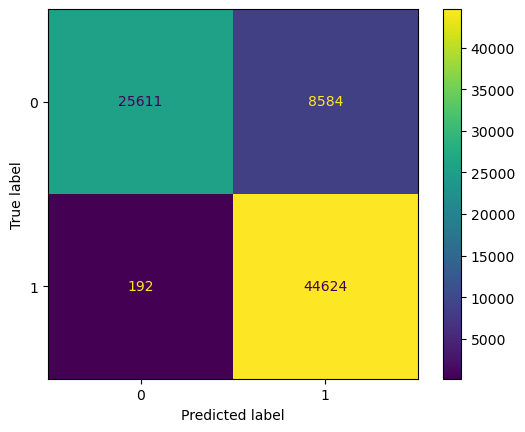

In [42]:
plot_confusion_matrix(log_model,scaled_X_test,y_test)

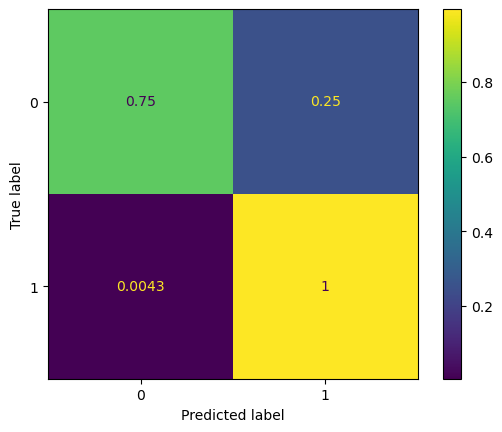

In [43]:
plot_confusion_matrix(log_model,scaled_X_test,y_test,normalize='true')

In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.75      0.85     34195
           1       0.84      1.00      0.91     44816

    accuracy                           0.89     79011
   macro avg       0.92      0.87      0.88     79011
weighted avg       0.91      0.89      0.89     79011



In [45]:
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve,plot_roc_curve

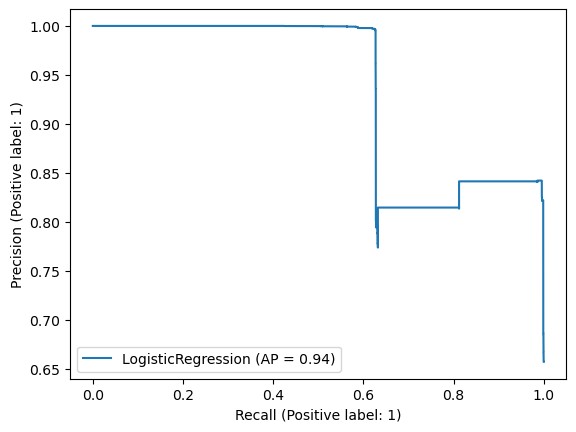

In [46]:
plot_precision_recall_curve(log_model,scaled_X_test,y_test)

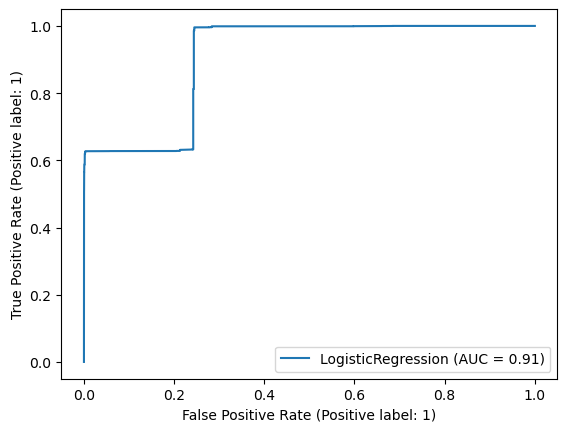

In [47]:
plot_roc_curve(log_model,scaled_X_test,y_test)

# KNN

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [50]:
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [51]:
y_pred = knn_model.predict(scaled_X_test)

In [52]:
y_pred = (y_pred > 0.5)

In [53]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [54]:
accuracy_score(y_test,y_pred)

0.9994051461188949

In [55]:
confusion_matrix(y_test,y_pred)

array([[34185,    10],
       [   37, 44779]], dtype=int64)

In [56]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34195
           1       1.00      1.00      1.00     44816

    accuracy                           1.00     79011
   macro avg       1.00      1.00      1.00     79011
weighted avg       1.00      1.00      1.00     79011



In [57]:
scaler = StandardScaler()

In [58]:
knn = KNeighborsClassifier()

In [59]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [60]:
operations = [('scaler',scaler),('knn',knn)]

In [61]:
from sklearn.pipeline import Pipeline

In [62]:
pipe = Pipeline(operations)

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
k_values = list(range(1,11))

In [65]:
k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [66]:
param_grid = {'knn__n_neighbors': k_values}

In [67]:
full_cv_classifier = GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')

In [68]:
full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

In [69]:
full_cv_classifier.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

In [70]:
full_cv_classifier.cv_results_['mean_test_score'][3]

0.999427537584015

In [71]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=3))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=3),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 3,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [72]:
full_cv_classifier.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_knn__n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [73]:
full_cv_classifier.cv_results_['mean_test_score']

array([0.99939346, 0.99942754, 0.99950932, 0.99942754, 0.99948887,
       0.99949569, 0.99946843, 0.99944798, 0.99938665, 0.9993662 ])

In [74]:
scaler = StandardScaler()
knn3 = KNeighborsClassifier(n_neighbors=3)
operations = [('scaler',scaler),('knn3',knn3)]

In [75]:
pipe = Pipeline(operations)

In [76]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn3', KNeighborsClassifier(n_neighbors=3))])

In [77]:
pipe_pred = pipe.predict(X_test)

In [78]:
pipe_pred = (pipe_pred > 0.5)

In [79]:
print(classification_report(y_test,pipe_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34195
           1       1.00      1.00      1.00     44816

    accuracy                           1.00     79011
   macro avg       1.00      1.00      1.00     79011
weighted avg       1.00      1.00      1.00     79011

